In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.6 MB/s eta 0:00:00


In [ ]:
pip install scikit-learn==0.18 --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 61.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects


In [ ]:
import    numpy                   as     np
import    pandas                  as     pd
import    matplotlib.pyplot       as     plt
from      sklearn.preprocessing   import LabelEncoder
import    category_encoders       as     ce
from      seaborn                 import heatmap
import    seaborn                 as     sns
from      sklearn.neighbors       import LocalOutlierFactor
from      sklearn.model_selection import train_test_split , GridSearchCV
from      sklearn.preprocessing   import StandardScaler , MinMaxScaler
from      sklearn.metrics         import accuracy_score, confusion_matrix, f1_score, recall_score , precision_score
import    lightgbm
from      imblearn.under_sampling import RandomUnderSampler
from      imblearn.over_sampling  import RandomOverSampler , SMOTE
import    seaborn
from      sklearn.linear_model    import LogisticRegression
from      sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from      mlxtend.classifier      import EnsembleVoteClassifier, StackingCVClassifier
from      sklearn.neural_network  import MLPClassifier

In [ ]:
Fta_df=pd.read_csv(r'/content/drive/MyDrive/math_score/train(3).csv')

In [ ]:
Fta_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,LE3,A,4,4,health,other,...,4,2,4,1,1,4,14,12,10,11
1,MS,F,18,R,LE3,T,4,4,teacher,services,...,5,4,3,3,4,2,4,8,9,10
2,GP,M,19,U,GT3,T,3,3,other,other,...,4,4,4,1,1,3,20,15,14,13
3,GP,F,16,U,GT3,T,3,3,other,services,...,4,3,3,2,4,5,54,11,12,11
4,GP,F,17,U,GT3,T,3,2,other,other,...,4,3,2,2,3,2,0,7,8,0


In [ ]:
Fta_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
Encoder1=ce.TargetEncoder()
Encoder2=ce.OneHotEncoder()

In [ ]:
X=Fta_df.drop(['G3'],axis=1)
Y=Fta_df['G3']

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=22)
XVtest, XVvalid, YVtest, YVvalid = train_test_split(Xtest, Ytest, test_size=0.5)

In [ ]:
Encoder1.fit(Xtrain, Ytrain)


TargetEncoder(cols=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
                    'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
                    'activities', 'nursery', 'higher', 'internet', 'romantic'])

In [ ]:
X_train_encoded = Encoder1.transform(Xtrain)
X_test_encoded = Encoder1.transform(Xtest)
X_test_Vencoded = Encoder1.transform(XVtest)
X_valid_Vencoded = Encoder1.transform(XVvalid)


In [ ]:
X_train_encoded.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
298,9.430339,11.057348,19,10.655340,10.800715,10.203320,1,1,10.019483,10.055865,...,10.720930,3,2,3,3,3,5,5,8,9
186,9.430339,11.057348,18,9.079811,10.077720,10.203320,3,2,10.019483,10.013514,...,10.720930,2,5,5,5,5,5,10,11,13
114,10.445887,9.639458,17,10.655340,10.800715,10.203320,2,4,10.577514,10.274015,...,9.505506,4,3,2,1,1,5,0,14,15
266,10.445887,9.639458,18,10.655340,10.077720,10.752923,4,4,8.662522,11.301830,...,10.720930,4,3,4,1,1,3,6,5,6
299,10.445887,9.639458,15,10.655340,10.077720,10.203320,2,2,10.019483,10.013514,...,10.720930,5,1,2,1,1,3,8,7,8


<Axes: >

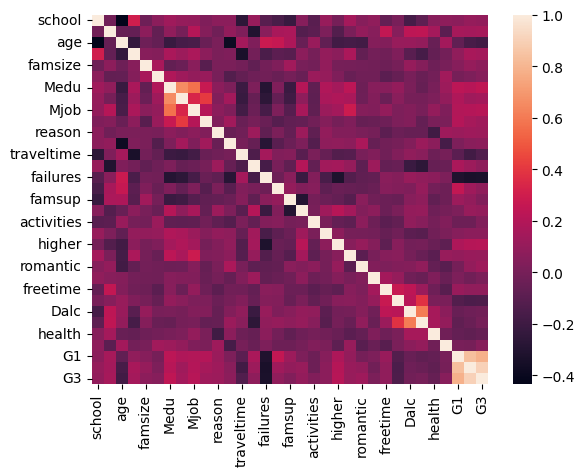

In [ ]:
merged_train = pd.concat([X_train_encoded, Ytrain], axis=1)
cor=merged_train.corr()
heatmap(cor)

In [ ]:
X_train_encoded.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
298,9.430339,11.057348,19,10.655340,10.800715,10.203320,1,1,10.019483,10.055865,...,10.720930,3,2,3,3,3,5,5,8,9
186,9.430339,11.057348,18,9.079811,10.077720,10.203320,3,2,10.019483,10.013514,...,10.720930,2,5,5,5,5,5,10,11,13
114,10.445887,9.639458,17,10.655340,10.800715,10.203320,2,4,10.577514,10.274015,...,9.505506,4,3,2,1,1,5,0,14,15
266,10.445887,9.639458,18,10.655340,10.077720,10.752923,4,4,8.662522,11.301830,...,10.720930,4,3,4,1,1,3,6,5,6
299,10.445887,9.639458,15,10.655340,10.077720,10.203320,2,2,10.019483,10.013514,...,10.720930,5,1,2,1,1,3,8,7,8


In [ ]:
cols=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
                    'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
                    'activities', 'nursery', 'higher', 'internet', 'romantic','G3']
traindatas=X_train_encoded.copy()
for column in X_train_encoded.columns :
  print(column)
  if column not in cols:
    median=int(X_train_encoded[column].median())
    Q1=X_train_encoded[column].quantile(0.25)
    Q3=X_train_encoded[column].quantile(0.75)
    IQR=Q3-Q1
    Up=Q3+1.5*IQR
    Down=Q1-1.5*IQR
    outliers=X_train_encoded[(X_train_encoded[column]>Up)|(X_train_encoded[column]<Down)]
    traindatas[column][(traindatas[column]>Up)]=Up
    traindatas[column][(traindatas[column]<Down)]=Down
  else:
    continue

school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2


<ipython-input-16-a4d502296aac>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindatas[column][(traindatas[column]>Up)]=Up
<ipython-input-16-a4d502296aac>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindatas[column][(traindatas[column]<Down)]=Down
<ipython-input-16-a4d502296aac>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindatas[column][(traindatas[column]>Up)]=Up
<ipython-input-16-a4d502296aac>:16: SettingWithC

In [ ]:
outliers

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
159,10.445887,9.639458,16,10.655340,10.077720,10.752923,3,3,10.019483,10.013514,...,9.505506,4,3,2,1,1,5,0,4,0
91,10.445887,9.639458,15,10.655340,10.077720,10.203320,1,1,8.662522,10.013514,...,9.505506,4,3,3,1,2,4,0,8,0
259,10.445887,11.057348,19,10.655340,10.077720,10.203320,3,2,10.577514,10.055865,...,9.505506,4,5,4,1,1,4,0,5,0
357,10.445887,9.639458,15,9.079811,10.077720,10.203320,3,4,10.577514,11.301830,...,9.505506,4,2,2,2,2,5,0,12,0
270,10.445887,9.639458,15,10.655340,10.077720,10.203320,4,4,10.577514,10.055865,...,9.505506,4,3,3,1,1,5,0,11,0
275,10.445887,9.639458,18,9.079811,10.077720,10.203320,2,1,10.019483,10.013514,...,9.505506,4,3,5,1,2,3,0,6,0
210,10.445887,11.057348,16,10.655340,10.800715,10.203320,4,3,11.285834,10.013514,...,10.720930,5,4,5,1,1,3,0,6,0
84,10.445887,11.057348,17,9.079811,10.077720,10.203320,3,4,8.662522,10.013514,...,10.720930,5,4,5,2,4,5,0,10,0


In [ ]:
scaler          = MinMaxScaler      ()
Xtrain_scale    = scaler.fit        (traindatas)
ScaledData      = scaler.transform  (traindatas)
ScaledTestData  = scaler.transform  (X_test_encoded)
ScaledVTestData = scaler.transform  (X_test_Vencoded)
ScaledValidData = scaler.transform  (X_valid_Vencoded)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

tree = DecisionTreeRegressor(random_state=1000, criterion='squared_error', max_depth=3)
pred = cross_val_predict(tree, ScaledData , Ytrain, cv=6)
np.sqrt(mean_squared_error(Ytrain, pred))


1.877424758774098

In [ ]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(random_state=12, hidden_layer_sizes=(4,8,16,32), learning_rate_init=0.04, max_iter=500)
pred = cross_val_predict(MLP,ScaledData , Ytrain , cv=5)
np.sqrt(mean_squared_error(Ytrain, pred))

2.2029995835486478

In [ ]:
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeRegressor(random_state=42)
par = {'criterion':['squared_error'],
       'max_depth':[3,4,5,6],
      'min_samples_split':[3,4,5,6]}
GS = GridSearchCV(tree, param_grid=par, cv=4, scoring='neg_mean_squared_error')
GS.fit(ScaledData,Ytrain)
GS.best_params_
GS.best_score_
best_tree = GS.best_estimator_
best_tree.fit(ScaledData,Ytrain)
pred = best_tree.predict(ScaledTestData)
np.sqrt(mean_squared_error(Ytest, pred))

1.8639105172500299

In [ ]:
from sklearn.svm import SVR
sv = SVR()
scores = cross_val_score(sv, ScaledData, Ytrain, cv=5, scoring='neg_mean_squared_error')
np.sqrt(-1*scores.mean())

3.532614503495179

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=4)
scores = cross_val_score(KNN, ScaledData,Ytrain, cv=5, scoring='neg_mean_squared_error')
np.sqrt(-1*scores.mean())

3.904160080339182

In [ ]:
KNN.fit(ScaledData, Ytrain)
MLP.fit(ScaledData, Ytrain)
pred1 = KNN.predict(ScaledTestData)
pred2 = MLP.predict(ScaledTestData)

preds = 0.6*pred1 + 0.4*pred2
np.sqrt(mean_squared_error(Ytest, pred))

1.8639105172500299

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=42)
regressor.fit(ScaledData, Ytrain)
predictions = regressor.predict(ScaledTestData)
mse = mean_squared_error(Ytest, predictions)
rmse=np.sqrt(mse)
print(f"Mean Squared Error on Test Data: {rmse}")


Mean Squared Error on Test Data: 1.8274460016342176
